In [ ]:
import collections
import numpy as np

def generate_possible_digit_sums(
    num: str, digit_sums: list[list[str]], current_digit_sum: list[str]
) -> None:
    if len(num) == 0:
        digit_sums.append(current_digit_sum[:])
    elif len(num) == 1:
        current_digit_sum.append(num)
        generate_possible_digit_sums("", digit_sums, current_digit_sum)
        current_digit_sum.pop()
    else:
        for i in range(1, len(num)):
            left_part = num[0:i]
            right_part = num[i:]
            print(f"{left_part} | {right_part}")
            current_digit_sum.append(left_part)
            generate_possible_digit_sums(right_part, digit_sums, current_digit_sum)
            current_digit_sum.pop()

digit_sums = []
generate_possible_digit_sums(np.base_repr(123, 10), digit_sums, current_digit_sum=[])

# def iter_possible_digit_sums(num, base):
#     queue = collections.deque([(np.base_repr(num, base), "")])
#     while queue:
#         curr_num, digit_sums = queue.popleft()
#         print(f"{curr_num} | {digit_sums}")
#         if curr_num:
#             for i in range(1, len(curr_num)):
#                 left_part = curr_num[:i]
#                 right_part = curr_num[i:]
#                 queue.append((left_part, f"{right_part} + {digit_sums}"))
#         else:
#             yield digit_sums

# for digit_sum in iter_possible_digit_sums(12, 10):
#     print(digit_sum)
for digit_sum in digit_sums:
    print(" + ".join(digit_sum))

In [ ]:
np.base_repr(10, 10)

In [ ]:
import functools

def groups(d, c = []):
  if not d:
     yield c
  else:
    if c:
       yield from groups(d[1:], c=c[:-1] + [f"{c[-1]}{d[0]}"])
    yield from groups(d[1:], c + [d[0]])

def get_possible_sums(num_str):
   for group in groups(num_str):
      if len(group) > 1:
         print(group)
         yield sum(map(int, group))

# @functools.cache
# def count_min_digit_sum_reduction_steps(num, base):
#    num_repr = np.base_repr(num, base)
#    print(num, num_repr)
#    if len(num_repr) == 1:
#       return 0
#    return 1 + min(
#       count_min_digit_sum_reduction_steps(sum_, base) for sum_ in get_possible_sums(num_repr)
#    )

# assert count_min_digit_sum_reduction_steps(10, 10) == 1
# assert count_min_digit_sum_reduction_steps(8, 10) == 0
# assert count_min_digit_sum_reduction_steps(99999, 10) == 2

# result_sum = 0

# for num in range(1, 101):
#    base_10_step_count = count_min_digit_sum_reduction_steps(num, 10)
#    base_3_step_count = count_min_digit_sum_reduction_steps(num, 3)
#    if base_10_step_count == base_3_step_count:
#       print(num)
#       result_sum += num

# result_sum
# count_min_digit_sum_reduction_steps(10, 3)

In [55]:
import networkx as nx

def groups(d, c = []):
  if not d:
     yield c
  else:
    if c:
       yield from groups(d[1:], c=c[:-1] + [f"{c[-1]}{d[0]}"])
    yield from groups(d[1:], c + [d[0]])

def get_possible_sums(num_str):
   for group in groups(num_str):
        if len(group) > 1:
            yield sum(map(int, group))

def generate_graph(limit, base):
    G = nx.Graph()

    edges = []

    for num in range(1, limit + 1):
        num_repr = np.base_repr(num, base)
        if len(num_repr) == 1:
            edges.append((num_repr, ""))
        else:
            for sum_ in get_possible_sums(num_repr):
                edges.append((num_repr, np.base_repr(sum_, base)))
        
    G.add_edges_from(edges)

    return G

LIMIT = 100
TARGET_NODES = set(map(str, range(0, 10))) | {""}

def count_min_digit_sum_reduction_steps(num, base, G_base_n):
    start_node = np.base_repr(num, base)
    shortest_paths = nx.single_source_shortest_path_length(G_base_n, source=start_node, cutoff=None)
    return min(length for node, length in shortest_paths.items() if node in TARGET_NODES)

G_base_10 = generate_graph(LIMIT, 10)
G_base_3 = generate_graph(LIMIT, 3)

result_sum = 0

for num in range(1, LIMIT + 1):
    base_10_step_count = count_min_digit_sum_reduction_steps(num, 10, G_base_10)
    base_3_step_count = count_min_digit_sum_reduction_steps(num, 3, G_base_3)
    if base_10_step_count == base_3_step_count:
       result_sum += num

result_sum
# start_node = "10"
# target_nodes = set(map(str, range(0, 10)))

# # Perform Dijkstra's algorithm
# shortest_paths = nx.single_source_shortest_path_length(G_base_10, source=start_node, cutoff=None)

# # Filter the results for the target nodes
# target_paths = {node: length for node, length in shortest_paths.items() if node in target_nodes}

# # Print the shortest paths to the target nodes
# for node, length in target_paths.items():
#     print(f"Shortest path from node {start_node} to node {node}: {length} steps")

2361

{'', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

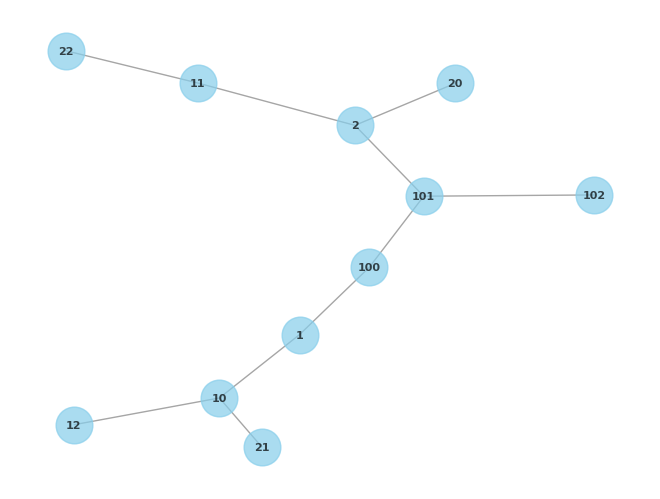

In [51]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G_base_3)
nx.draw(G_base_3, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, font_color='black', edge_color='gray', linewidths=1, alpha=0.7)
plt.show()